In [1]:
! pip install split-folders


In [2]:
# Split Data according to the class
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Image Recognition/Final Dataset', output="output1", seed=1337, ratio=(.8, 0.15,0.05))

Copying files: 2520 files [01:13, 34.08 files/s] 


In [116]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, Xception
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from PIL  import Image


In [4]:
# defining training and testing dir
train_dir = '/content/output1/train'
test_dir = '/content/output1/test'

In [32]:

# dividing data into trainning and testing data
train_data = keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224))

test_data = keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224))

Found 2016 files belonging to 5 classes.
Found 127 files belonging to 5 classes.


In [33]:
# function ofr rescalling the pixel value
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label
train_data = train_data.map(process)
test_data = test_data.map(process)

In [34]:
# importing pretrained cnn model

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False



In [35]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [36]:
# creating a model
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(5, activation='softmax'))


In [37]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,178,949 (80.79 MB)

 Trainable params: 6,464,261 (24.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [40]:
# training a model
history = model.fit(train_data, epochs=200, validation_data=test_data, batch_size=32,  callbacks=[early_stopping])


Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - accuracy: 0.2717 - loss: 1.7369 - val_accuracy: 0.6457 - val_loss: 1.2407
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.4021 - loss: 1.3220 - val_accuracy: 0.7874 - val_loss: 0.9953
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.5083 - loss: 1.2008 - val_accuracy: 0.7638 - val_loss: 0.8931
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.5494 - loss: 1.0789 - val_accuracy: 0.7795 - val_loss: 0.8038
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.6064 - loss: 0.9682 - val_accuracy: 0.7717 - val_loss: 0.7064
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.6584 - loss: 0.8775 - val_accuracy: 0.8189 - val_loss: 0.5744
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.6965 - loss: 0.7813 - val_accuracy: 0.8346 - val_loss: 0.5436
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.7360 - loss: 0.7154 - 

Text(0, 0.5, 'accuracy')

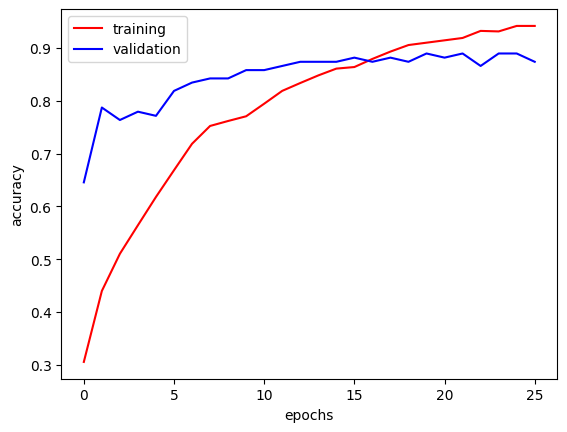

In [41]:
# plotting graph for accuracy and validation accuaracy
plt.plot(history.history['accuracy'], color ='red', label='training')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

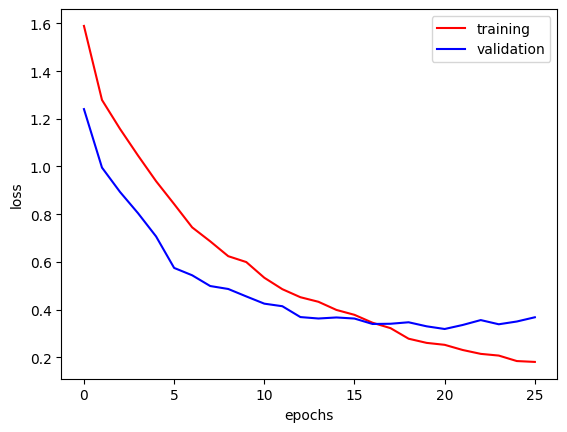

In [42]:
# plotting graph for loss and validation loss thorughot the training process
plt.plot(history.history['loss'], color ='red', label='training')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [51]:
# evaluting model
 model.evaluate(test_data)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.8757 - loss: 0.3361


[0.3182280659675598, 0.8818897604942322]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


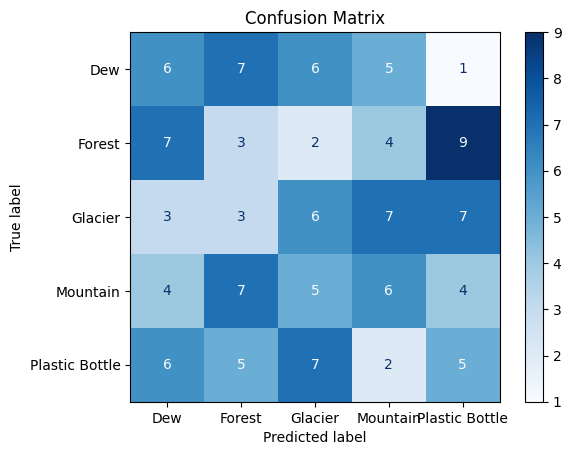

In [120]:
# confusion matrix and displaying with labels


# Get predictions for the test data
y_pred_probs = model.predict(test_data)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Extract true labels from the test data
y_true_labels = []
for images, labels in test_data:
  y_true_labels.extend(np.argmax(labels.numpy(), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

class_names = ['Dew', 'Forest', 'Glacier', 'Mountain', 'Plastic Bottle']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [45]:
model.save('image_reco_vgg_extra.keras')

In [46]:
# loading model

model = load_model('/content/image_reco_vgg_extra.keras')

In [57]:
def get_img_input(path):
  img = tf.keras.preprocessing.image.load_img(path,target_size = (224,224))
  img_array = tf.keras.preprocessing.image.img_to_array(img)

  img_array = tf.expand_dims(img_array,0)
  return img_array

In [108]:
img = get_img_input('/content/output1/val/Plastic Bottle/00000490.jpg')


In [109]:
result = model.predict(img)
y_pred2 = pd.DataFrame(np.argmax(result, axis=1))
y_pred2



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


,0
0,4


In [110]:
y_pred = y_pred2[0][0]

if y_pred == 0:
  print("Dew")
elif y_pred == 1:
  print("Forest")
elif y_pred == 2:
  print("Glacier")
elif y_pred == 3:
  print("Mountain")
elif y_pred == 4:
  print("Plastic Bottles")

Plastic Bottles
